In [ ]:
# pyarrow might be needed to read the data
!python -m pip install Cython
!python -m pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
!python -m pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
!python -m pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
!python -m pip install pyarrow
!python -m pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining turbofats from git+https://****@github.com/alercebroker/turbo-fats#egg=turbofats
  Cloning https://****@github.com/alercebroker/turbo-fats to ./src/turbofats
  Running command git clone -q 'https://****@github.com/alercebroker/turbo-fats' /content/src/turbofats
  Running setup.py develop for turbofats
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining mhps from git+https://****@github.com/alercebroker/mhps#egg=mhps
  Cloning https://****@github.com/alercebroker/mhps to ./src/mhps
  Running command git clone -q 'https://****@github.com/alercebroker/mhps' /content/src/mhps
  Running setup.py develop for mhps
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining P4J from gi

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lc_classifier.utils import LightcurveBuilder


In [ ]:
pathData =  "/content/drive/MyDrive/ColabNotebooks/InteligenciaComputacional/Projeto/Dados/"

!ls /content/drive/MyDrive/ColabNotebooks/InteligenciaComputacional/Projeto/Dados/

detections_SNe_v7.0.1.csv	       dfcrossmatches_prioritized_v7.0.1.gsheet
detections_SNe_v7.0.1.gsheet	       features_preprocessed.csv
dfcrossmatches_prioritized_v7.0.1.csv  features_raw.csv


In [ ]:
# read the datasets
df_crossmatches = pd.read_csv(pathData+"dfcrossmatches_prioritized_v7.0.1.csv")
df_detections = pd.read_csv(pathData+"detections_SNe_v7.0.1.csv")

## Join Data

In [ ]:
# print the datasets
df_crossmatches.set_index('oid')
df_detections.set_index('objectId')
#df_joined = pd.concat([df_crossmatches, df_detections], axis=1, join='inner')
df_joined = pd.merge(df_crossmatches, df_detections, left_on='oid', right_on='objectId')
df_joined.pop('Unnamed: 0')
#df_joined.rename(columns = {'Unnamed: 0':'key'}, inplace = True)
print(df_joined)

                 oid classALeRCE        ra_x      dec_x period source  \
0       ZTF18acqyvag        SLSN  143.373151   0.052342    NaN    TNS   
1       ZTF18acqyvag        SLSN  143.373151   0.052342    NaN    TNS   
2       ZTF18acqyvag        SLSN  143.373151   0.052342    NaN    TNS   
3       ZTF18acqyvag        SLSN  143.373151   0.052342    NaN    TNS   
4       ZTF18acqyvag        SLSN  143.373151   0.052342    NaN    TNS   
...              ...         ...         ...        ...    ...    ...   
128713  ZTF19adcfsad       SNIbc  186.112708  13.232748    NaN    TNS   
128714  ZTF19adcfsad       SNIbc  186.112708  13.232748    NaN    TNS   
128715  ZTF19adcfsad       SNIbc  186.112708  13.232748    NaN    TNS   
128716  ZTF19adcfsad       SNIbc  186.112708  13.232748    NaN    TNS   
128717  ZTF19adcfsad       SNIbc  186.112708  13.232748    NaN    TNS   

         id_source class_source  separation_arcsec      objectId  ...  \
0       SN 2018lfe       SLSN-I           0.081967

Removing columns with data that we will not use

In [ ]:
df_joined = df_joined[['oid', 'classALeRCE', 'fid', 'mjd', 'magpsf_corr', 'sigmapsf_corr']]

print("Removed useless columns")

print(df_joined)

Removed useless columns
                 oid classALeRCE  fid           mjd  magpsf_corr  \
0       ZTF18acqyvag        SLSN    1  58487.443738    19.789676   
1       ZTF18acqyvag        SLSN    1  58443.521319    20.114477   
2       ZTF18acqyvag        SLSN    1  58480.479375    19.686444   
3       ZTF18acqyvag        SLSN    1  58468.441157    19.312903   
4       ZTF18acqyvag        SLSN    1  58475.525972    19.461434   
...              ...         ...  ...           ...          ...   
128713  ZTF19adcfsad       SNIbc    2  58901.399016    18.634505   
128714  ZTF19adcfsad       SNIbc    2  58895.442002    18.531276   
128715  ZTF19adcfsad       SNIbc    2  58881.358380    18.439007   
128716  ZTF19adcfsad       SNIbc    2  58914.404942    18.658384   
128717  ZTF19adcfsad       SNIbc    2  58892.316435    18.501861   

        sigmapsf_corr  
0            0.144554  
1            0.144098  
2            0.217899  
3            0.086670  
4            0.231692  
...            

Removed band with less samples

In [ ]:
#drop rows that contain specific 'value' in 'column_name'
df_oneBand = df_joined[df_joined.fid == 2]
print(df_oneBand)

                 oid classALeRCE  fid           mjd  magpsf_corr  \
8       ZTF18acqyvag        SLSN    2  58480.420671    19.465944   
9       ZTF18acqyvag        SLSN    2  58472.441250    19.317035   
10      ZTF18acqyvag        SLSN    2  58487.421262    19.684906   
11      ZTF18acqyvag        SLSN    2  58465.482095    19.287676   
12      ZTF18acqyvag        SLSN    2  58481.483403    19.562716   
...              ...         ...  ...           ...          ...   
128713  ZTF19adcfsad       SNIbc    2  58901.399016    18.634505   
128714  ZTF19adcfsad       SNIbc    2  58895.442002    18.531276   
128715  ZTF19adcfsad       SNIbc    2  58881.358380    18.439007   
128716  ZTF19adcfsad       SNIbc    2  58914.404942    18.658384   
128717  ZTF19adcfsad       SNIbc    2  58892.316435    18.501861   

        sigmapsf_corr  
8            0.172105  
9            0.115124  
10           0.125810  
11           0.102528  
12           0.114477  
...               ...  
128713     100.

Removed rows with NaN on magnitude and error since these do not provide aditional value.

In [ ]:
df_oneBand_noNaN = df_oneBand.dropna(subset=["magpsf_corr","sigmapsf_corr"])
df_oneBand_noNaN.rename(columns = {'fid':'band','mjd':'time','magpsf_corr':'magnitude','sigmapsf_corr':'error'}, inplace = True)
print(df_oneBand_noNaN)
df_oneBand_noNaN.set_index('oid')

                 oid classALeRCE  band          time  magnitude       error
8       ZTF18acqyvag        SLSN     2  58480.420671  19.465944    0.172105
9       ZTF18acqyvag        SLSN     2  58472.441250  19.317035    0.115124
10      ZTF18acqyvag        SLSN     2  58487.421262  19.684906    0.125810
11      ZTF18acqyvag        SLSN     2  58465.482095  19.287676    0.102528
12      ZTF18acqyvag        SLSN     2  58481.483403  19.562716    0.114477
...              ...         ...   ...           ...        ...         ...
128713  ZTF19adcfsad       SNIbc     2  58901.399016  18.634505  100.000000
128714  ZTF19adcfsad       SNIbc     2  58895.442002  18.531276  100.000000
128715  ZTF19adcfsad       SNIbc     2  58881.358380  18.439007  100.000000
128716  ZTF19adcfsad       SNIbc     2  58914.404942  18.658384  100.000000
128717  ZTF19adcfsad       SNIbc     2  58892.316435  18.501861    0.041457

[28022 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,classALeRCE,band,time,magnitude,error
oid,,,,,
ZTF18acqyvag,SLSN,2,58480.420671,19.465944,0.172105
ZTF18acqyvag,SLSN,2,58472.441250,19.317035,0.115124
ZTF18acqyvag,SLSN,2,58487.421262,19.684906,0.125810
ZTF18acqyvag,SLSN,2,58465.482095,19.287676,0.102528
ZTF18acqyvag,SLSN,2,58481.483403,19.562716,0.114477
...,...,...,...,...,...
ZTF19adcfsad,SNIbc,2,58901.399016,18.634505,100.000000
ZTF19adcfsad,SNIbc,2,58895.442002,18.531276,100.000000
ZTF19adcfsad,SNIbc,2,58881.358380,18.439007,100.000000


Removed rows with error equal to 100 because that data isnt relevant


In [ ]:
df_oneBand_noNaN = df_oneBand_noNaN[df_oneBand_noNaN.error != 100.000000]
df_oneBand_noNaN

,oid,classALeRCE,band,time,magnitude,error
8,ZTF18acqyvag,SLSN,2,58480.420671,19.465944,0.172105
9,ZTF18acqyvag,SLSN,2,58472.441250,19.317035,0.115124
10,ZTF18acqyvag,SLSN,2,58487.421262,19.684906,0.125810
11,ZTF18acqyvag,SLSN,2,58465.482095,19.287676,0.102528
12,ZTF18acqyvag,SLSN,2,58481.483403,19.562716,0.114477
...,...,...,...,...,...,...
128705,ZTF19adcfsad,SNIbc,2,58850.485972,17.899015,0.026912
128707,ZTF19adcfsad,SNIbc,2,58859.480799,17.753043,0.034589
128708,ZTF19adcfsad,SNIbc,2,58887.516354,18.473802,0.028517
128712,ZTF19adcfsad,SNIbc,2,58871.500891,18.186477,0.033907


## Feature Extractor

In [ ]:
bands = [2]

#n_curves = len(pd.unique(df_oneBand_noNaN['oid']))
#n_curves = len(df_oneBand_noNaN)
df_grouped = df_oneBand_noNaN.groupby('oid')

lightcurves = []
# iterate over each group
for group_name, df_group in df_grouped:

    lightcurve_builder = LightcurveBuilder(f'{group_name}')
    #band = []
    band = bands[0]
    time = []
    magnitude = []
    error = []
    # iterate over each lightcurve with same id and fill vectors
    for row_index, row in df_group.iterrows():
      #for band in bands: # TODO not done correctly for bands
        #band.append(row['band'])
        time.append(row['time'])
        magnitude.append(row['magnitude'])
        error.append(row['error'])

    # builds the lightcurve with vectors
    lightcurve_builder.add_band(
        band,
        time,
        magnitude,
        error)

    lightcurve = lightcurve_builder.build_dataframe()
    lightcurves.append(lightcurve)
lightcurves = pd.concat(lightcurves)
lightcurves


,time,magnitude,error,band
oid,,,,
ZTF17aadlxmv,58900.187523,16.591813,0.019231,2
ZTF17aadlxmv,58900.187523,16.591813,0.019231,2
ZTF18aahatvc,58976.303808,17.760771,0.009883,2
ZTF18aahatvc,58976.332187,17.691167,0.035292,2
ZTF18aahatvc,58976.303808,17.760771,0.009883,2
...,...,...,...,...
ZTF20abgfekk,59040.201840,17.471903,0.038842,2
ZTF20abgfekk,59034.318171,17.433178,0.050252,2
ZTF20abgfekk,59022.221539,18.139962,0.036060,2


Plotting the light curve

"\nplt.subplot(2, 1, 2)\nfor band in bands:\n    obs_in_band = lightcurves[lightcurves.band == band]\n    plt.errorbar(\n        (obs_in_band.time % true_period) / true_period * 2 * np.pi,\n        obs_in_band.magnitude,\n        yerr=obs_in_band.error,\n        fmt='.',\n        label=band\n    )\n\nplt.xlabel('Phase [radians]')\nplt.ylabel('Magnitude')\nplt.title(f'Folded light curve (Period {true_period:.3f} days)')\nplt.legend()\nplt.gca().invert_yaxis()\n\nplt.show()\n"

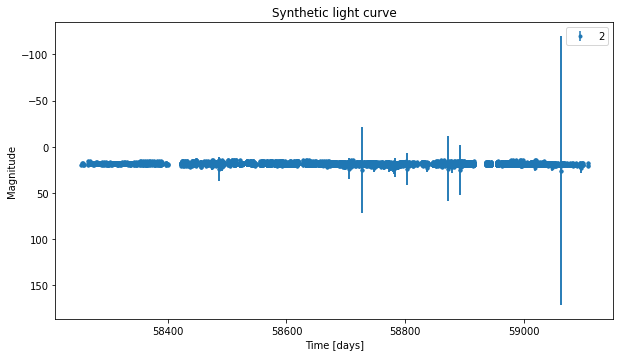

In [ ]:
fig = plt.figure(figsize=(10, 12))
fig.set_facecolor('white')
bands = [2]
plt.subplot(2, 1, 1)
for band in bands:
    obs_in_band = lightcurves[lightcurves.band == band]
    plt.errorbar(
        obs_in_band.time,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('Synthetic light curve')
plt.legend()
plt.gca().invert_yaxis()
'''
plt.subplot(2, 1, 2)
for band in bands:
    obs_in_band = lightcurves[lightcurves.band == band]
    plt.errorbar(
        (obs_in_band.time % true_period) / true_period * 2 * np.pi,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Phase [radians]')
plt.ylabel('Magnitude')
plt.title(f'Folded light curve (Period {true_period:.3f} days)')
plt.legend()
plt.gca().invert_yaxis()

plt.show()
'''

In [ ]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor

from lc_classifier.features import FeatureExtractorComposer

In [ ]:
bands = [2]

feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
)

In [ ]:
features = feature_extractor.compute_features(lightcurves)
features

ERROR:root:TypeError exception in PeriodExtractor: oid ZTF17aadlxmv
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18aahatvc
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18aapqwyv
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18aaqkdwu
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18aaxkfos
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18abcpmwh
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18abddrhd
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18abdfwcy
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18abdfydj
'NoneType' object is not iterable
ERROR:root:TypeError exception in PeriodExtractor: oid ZTF18abdrbqp
'NoneType' obj

,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,GP_DRW_sigma_2,...,Skew_2,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582560e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZTF18aahatvc,-5.931882e+06,-0.000449,7.561293e-11,4.0,1.0,NaN,NaN,NaN,NaN,9.937627e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZTF18aajkivu,1.929754e+01,0.007289,3.777056e-04,46.0,0.0,1.001001,0.010789,1.001001,0.000000,1.178786e-02,...,-0.856846,-0.122399,0.085071,0.663484,1.0,0.000017,0.212352,0.349122,0.993027,-0.000739
ZTF18aaoxryq,-1.515703e-02,-0.000177,1.165637e-02,6.0,0.0,0.096246,NaN,11.494252,11.398006,2.907160e-03,...,-0.378428,0.050000,0.058951,0.818592,1.0,0.000009,-0.500000,-0.500000,0.433805,-0.024048
ZTF18aapqwyv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582560e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbiet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.161659e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZTF20abgbvgl,2.915997e+02,1.601462,5.491986e-03,16.0,0.0,95.959588,0.107188,95.959588,0.000000,3.671553e-01,...,-0.115546,-0.892364,0.409342,0.825021,1.0,0.000419,12.068401,0.944600,0.972366,0.039749
ZTF20abgbxfm,2.091076e+02,9.485675,4.536265e-02,74.0,0.0,137.681149,0.131269,137.681149,0.000000,5.906065e-01,...,0.132025,-1.193911,0.634855,0.832948,1.0,0.001022,10.014596,0.949456,0.991550,0.032718


In [ ]:
features_cpy=features
df_noDup=df_oneBand_noNaN.drop_duplicates(subset=['oid'])

features_class=pd.merge(features,df_noDup[['oid','classALeRCE']],left_on='oid',right_on='oid',how='right')
print(features_class.head())

            oid  MHPS_ratio_2  MHPS_low_2  MHPS_high_2  MHPS_non_zero_2  \
0  ZTF18acqyvag     22.090452    0.083888     0.003797              5.0   
1  ZTF18acenqto      1.452479    0.090188     0.062092             70.0   
2  ZTF18abshezu    536.331787    6.329177     0.011801             30.0   
3  ZTF18abslpjy     88.861420   20.370335     0.229237             82.0   
4  ZTF19aanesgt     10.716300    0.186683     0.017420             14.0   

   MHPS_PN_flag_2  Multiband_period       PPE  Period_band_2  delta_period_2  \
0             1.0               NaN       NaN            NaN             NaN   
1             1.0          0.998738  0.096247     999.999953      999.001214   
2             0.0          1.003062  0.048588     999.999953      998.996891   
3             1.0        283.582089  0.021843     283.582089        0.000000   
4             0.0          0.185142  0.035135       0.185142        0.000000   

   ...  SmallKurtosis_2     Std_2  StetsonK_2  Pvar_2  ExcessVar_2  

In [ ]:
features_class.to_csv(pathData+'features_raw.csv', encoding='utf-8', index=True)

## Read Features Raw CSV

In [ ]:
features_raw = pd.read_csv(pathData + 'features_raw.csv')
features_raw.pop('Unnamed: 0')
features_raw

,oid,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,classALeRCE
0,ZTF18acqyvag,22.090452,0.083888,0.003797,5.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLSN
1,ZTF18acenqto,1.452479,0.090188,0.062092,70.0,1.0,0.998738,0.096247,999.999953,999.001214,...,1.385767,1.080584,0.922808,1.0,0.000611,-0.500000,-0.500000,0.998053,0.008624,SLSN
2,ZTF18abshezu,536.331787,6.329177,0.011801,30.0,0.0,1.003062,0.048588,999.999953,998.996891,...,-0.811784,0.517986,0.861637,1.0,0.000755,1.835929,0.439041,0.986716,-0.011949,SLSN
3,ZTF18abslpjy,88.861420,20.370335,0.229237,82.0,1.0,283.582089,0.021843,283.582089,0.000000,...,0.010128,1.562817,0.831060,1.0,-0.187700,-0.500000,-0.500000,0.997851,0.005057,SLSN
4,ZTF19aanesgt,10.716300,0.186683,0.017420,14.0,0.0,0.185142,0.035135,0.185142,0.000000,...,-0.831149,0.262021,0.877776,1.0,0.000174,0.811234,0.277575,0.879367,-0.000478,SLSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,ZTF20aalxlis,281.336578,23.224478,0.082551,48.0,0.0,206.521717,0.060233,206.521717,0.000000,...,-0.759402,0.884755,0.856525,1.0,0.002389,11.683791,1.178610,0.993593,0.021451,SNIbc
724,ZTF20aavcvrm,110.814598,2.192782,0.019788,60.0,0.0,50.397874,0.033728,50.397874,0.000000,...,-1.447639,0.455516,0.897520,1.0,0.000503,4.595963,0.645265,0.971963,0.020873,SNIbc
725,ZTF20aaurexl,545.559204,17.033440,0.031222,60.0,0.0,102.702699,0.085322,102.702699,0.000000,...,-1.076949,0.688289,0.925710,1.0,0.001222,14.218827,1.104718,0.992106,0.030587,SNIbc
726,ZTF19aanmzsb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNIbc


## Visualize and Analyse Data

### Class Imbalance

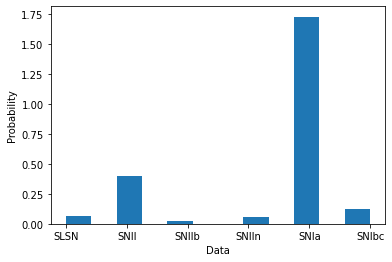

In [ ]:
%matplotlib inline

classes = features_raw.classALeRCE.values

x = classes

plt.hist(x, density=True, bins=12)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

- As we can see data is quite **unbalanced**, so we should aim to balance it further ahead.

### Missing Data

oid                    0
MHPS_ratio_2         130
MHPS_low_2           130
MHPS_high_2          130
MHPS_non_zero_2      130
                    ... 
SF_ML_amplitude_2    171
SF_ML_gamma_2        171
IAR_phi_2            171
LinearTrend_2        171
classALeRCE            0
Length: 62, dtype: int64


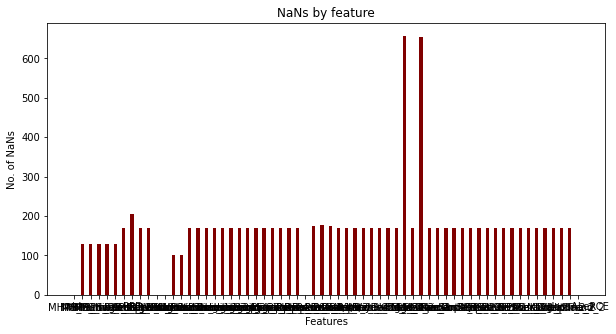

In [ ]:
nan_data = features_raw.isna().sum()
print(nan_data)
y = nan_data
x = list(features_raw.columns)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("No. of NaNs")
plt.title("NaNs by feature")
plt.show()

From this plot we can clearly see that there are two atributes named *Eta_e_2* and *MaxSlope_2* with almost all values as *NaN*, as such these have no real value and will be removed further down the line

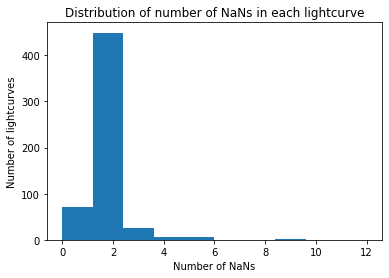

In [ ]:
rows_w_nan = features_raw.isnull().any(axis=1).sum()

percentage_rows_w_nan = rows_w_nan/len(features_raw)*100

#print('Percentage of Rows with atleast one NaN: ' + str(percentage_rows_w_nan) + '%')

row_num_of_nans = features_raw.isnull().sum(axis=1)
#print('\n\n')

x = classes

plt.hist(row_num_of_nans, density=False, bins=10, range=(0,12))  # density=False would make counts
plt.title('Distribution of number of NaNs in each lightcurve')
plt.ylabel('Number of lightcurves')
plt.xlabel('Number of NaNs');

Same plot but with diferent scale...



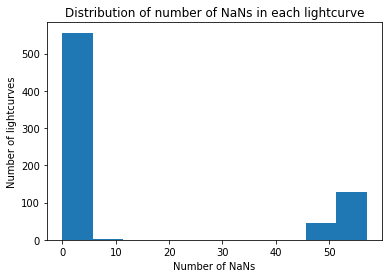

In [ ]:
print('Same plot but with diferent scale...\n')

plt.hist(row_num_of_nans, density=False, bins=10)  # density=False would make counts
plt.title('Distribution of number of NaNs in each lightcurve')
plt.ylabel('Number of lightcurves')
plt.xlabel('Number of NaNs');

As such we can see that a lot of NaNs are present so we cannot simply eliminate rows with NaNs otherwise we would only have left a very small portion of our data.

So maybe only eliminating those with a lot of NaNs makes more sense, and keeping those with less NaNs, for example deleting the lightcurves with more than 40 NaNs being that there is a total of 62 atributes.

## Preprocess Data

### Class Imbalance

We will be joining classes *SNII*, *SNIIb*, *SNIIn* and treating them as a new class *SNII_Joined*, this way our classes will be at least a little more balanced.

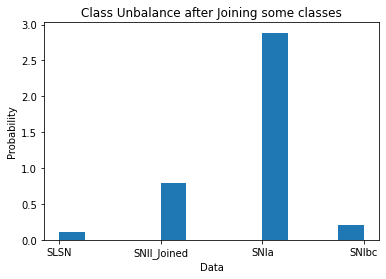

In [ ]:
# Applying the condition
features_raw.loc[features_raw["classALeRCE"] == "SNII", "classALeRCE"] = "SNII_Joined"
features_raw.loc[features_raw["classALeRCE"] == "SNIIb", "classALeRCE"] = "SNII_Joined"
features_raw.loc[features_raw["classALeRCE"] == "SNIIn", "classALeRCE"] = "SNII_Joined"


# New plot of class imbalance
%matplotlib inline

classes = features_raw.classALeRCE.values

x = classes

plt.hist(x, density=True, bins=12)  # density=False would make counts
plt.title('Class Unbalance after Joining some classes')
plt.ylabel('Probability')
plt.xlabel('Data');

### Remove some NaNs

As previously discussed, there are two atributes named *Eta_e_2* and *MaxSlope_2* with almost all values as *NaN*, as such these have no real value and will be removed.

In [ ]:
features_pop = features_raw.copy()

features_pop.pop('Eta_e_2')
features_pop.pop('MaxSlope_2')

features_pop

,oid,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,classALeRCE
0,ZTF18acqyvag,22.090452,0.083888,0.003797,5.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLSN
1,ZTF18acenqto,1.452479,0.090188,0.062092,70.0,1.0,0.998738,0.096247,999.999953,999.001214,...,1.385767,1.080584,0.922808,1.0,0.000611,-0.500000,-0.500000,0.998053,0.008624,SLSN
2,ZTF18abshezu,536.331787,6.329177,0.011801,30.0,0.0,1.003062,0.048588,999.999953,998.996891,...,-0.811784,0.517986,0.861637,1.0,0.000755,1.835929,0.439041,0.986716,-0.011949,SLSN
3,ZTF18abslpjy,88.861420,20.370335,0.229237,82.0,1.0,283.582089,0.021843,283.582089,0.000000,...,0.010128,1.562817,0.831060,1.0,-0.187700,-0.500000,-0.500000,0.997851,0.005057,SLSN
4,ZTF19aanesgt,10.716300,0.186683,0.017420,14.0,0.0,0.185142,0.035135,0.185142,0.000000,...,-0.831149,0.262021,0.877776,1.0,0.000174,0.811234,0.277575,0.879367,-0.000478,SLSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,ZTF20aalxlis,281.336578,23.224478,0.082551,48.0,0.0,206.521717,0.060233,206.521717,0.000000,...,-0.759402,0.884755,0.856525,1.0,0.002389,11.683791,1.178610,0.993593,0.021451,SNIbc
724,ZTF20aavcvrm,110.814598,2.192782,0.019788,60.0,0.0,50.397874,0.033728,50.397874,0.000000,...,-1.447639,0.455516,0.897520,1.0,0.000503,4.595963,0.645265,0.971963,0.020873,SNIbc
725,ZTF20aaurexl,545.559204,17.033440,0.031222,60.0,0.0,102.702699,0.085322,102.702699,0.000000,...,-1.076949,0.688289,0.925710,1.0,0.001222,14.218827,1.104718,0.992106,0.030587,SNIbc
726,ZTF19aanmzsb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNIbc


Now we can see that there are no more atribute outliers in terms of NaNs.

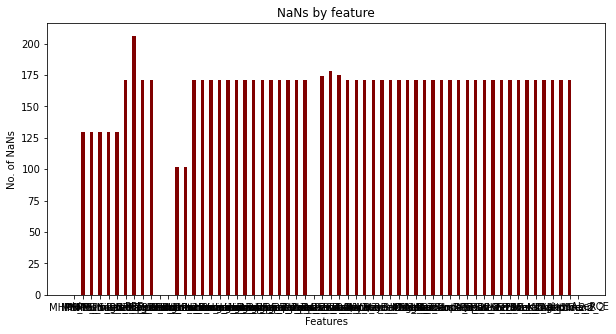

In [ ]:
nan_data = features_pop.isna().sum()
#print(nan_data)
y = nan_data
x = list(features_pop.columns)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("No. of NaNs")
plt.title("NaNs by feature")
plt.show()

Now we will remove the lightcurves with more than 60% of the atributes as NaNs since these do not provide much real value

In [ ]:
features_no_big_nan = features_pop[features_pop.isnull().sum(axis=1) < 40]

features_no_big_nan

,oid,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,classALeRCE
1,ZTF18acenqto,1.452479,0.090188,0.062092,70.0,1.0,0.998738,0.096247,999.999953,999.001214,...,1.385767,1.080584,0.922808,1.0,0.000611,-0.500000,-0.500000,0.998053,0.008624,SLSN
2,ZTF18abshezu,536.331787,6.329177,0.011801,30.0,0.0,1.003062,0.048588,999.999953,998.996891,...,-0.811784,0.517986,0.861637,1.0,0.000755,1.835929,0.439041,0.986716,-0.011949,SLSN
3,ZTF18abslpjy,88.861420,20.370335,0.229237,82.0,1.0,283.582089,0.021843,283.582089,0.000000,...,0.010128,1.562817,0.831060,1.0,-0.187700,-0.500000,-0.500000,0.997851,0.005057,SLSN
4,ZTF19aanesgt,10.716300,0.186683,0.017420,14.0,0.0,0.185142,0.035135,0.185142,0.000000,...,-0.831149,0.262021,0.877776,1.0,0.000174,0.811234,0.277575,0.879367,-0.000478,SLSN
5,ZTF18acyxnyw,506.537109,2.918541,0.005762,44.0,1.0,197.916661,0.019501,197.916661,0.000000,...,-0.712791,0.350003,0.803699,1.0,0.000319,1.587449,0.677863,0.984893,0.006356,SLSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,ZTF19abqwtfu,609.013855,8.720496,0.014319,96.0,0.0,199.999986,0.021373,199.999986,0.000000,...,-1.089584,0.839050,0.919236,1.0,0.002301,5.903105,0.804971,0.992911,0.017891,SNIbc
723,ZTF20aalxlis,281.336578,23.224478,0.082551,48.0,0.0,206.521717,0.060233,206.521717,0.000000,...,-0.759402,0.884755,0.856525,1.0,0.002389,11.683791,1.178610,0.993593,0.021451,SNIbc
724,ZTF20aavcvrm,110.814598,2.192782,0.019788,60.0,0.0,50.397874,0.033728,50.397874,0.000000,...,-1.447639,0.455516,0.897520,1.0,0.000503,4.595963,0.645265,0.971963,0.020873,SNIbc
725,ZTF20aaurexl,545.559204,17.033440,0.031222,60.0,0.0,102.702699,0.085322,102.702699,0.000000,...,-1.076949,0.688289,0.925710,1.0,0.001222,14.218827,1.104718,0.992106,0.030587,SNIbc


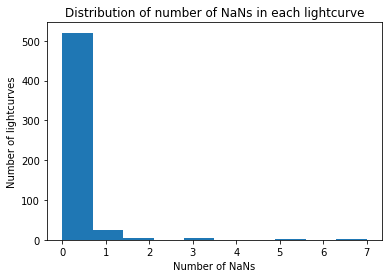

In [ ]:
rows_w_nan = features_no_big_nan.isnull().any(axis=1).sum()

percentage_rows_w_nan = rows_w_nan/len(features_no_big_nan)*100

#print('Percentage of Rows with atleast one NaN: ' + str(percentage_rows_w_nan) + '%')

row_num_of_nans = features_no_big_nan.isnull().sum(axis=1)
#print('\n\n')

plt.hist(row_num_of_nans, density=False, bins=10)  # density=False would make counts
plt.title('Distribution of number of NaNs in each lightcurve')
plt.ylabel('Number of lightcurves')
plt.xlabel('Number of NaNs');

oid                     0
MHPS_ratio_2            3
MHPS_low_2              3
MHPS_high_2             3
MHPS_non_zero_2         3
MHPS_PN_flag_2          3
Multiband_period        0
PPE                    35
Period_band_2           0
delta_period_2          0
GP_DRW_sigma_2          0
GP_DRW_tau_2            0
Psi_CS_2                0
Psi_eta_2               0
Harmonics_mag_1_2       0
Harmonics_mag_2_2       0
Harmonics_mag_3_2       0
Harmonics_mag_4_2       0
Harmonics_mag_5_2       0
Harmonics_mag_6_2       0
Harmonics_mag_7_2       0
Harmonics_phase_2_2     0
Harmonics_phase_3_2     0
Harmonics_phase_4_2     0
Harmonics_phase_5_2     0
Harmonics_phase_6_2     0
Harmonics_phase_7_2     0
Harmonics_mse_2         0
iqr_2                   0
Power_rate_1/4          3
Power_rate_1/3          7
Power_rate_1/2          4
Power_rate_2            0
Power_rate_3            0
Power_rate_4            0
Amplitude_2             0
AndersonDarling_2       0
Autocor_length_2        0
Beyond1Std_2

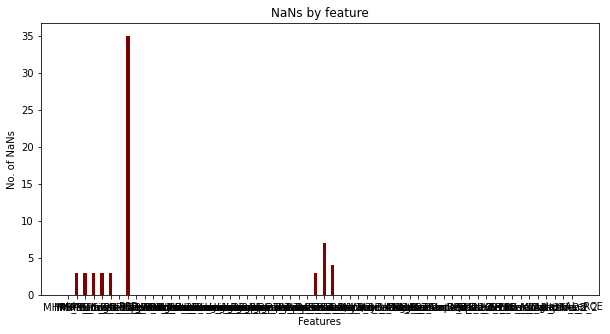

In [ ]:
nan_data = features_no_big_nan.isna().sum()
print(nan_data)
y = nan_data
x = list(features_no_big_nan.columns)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("No. of NaNs")
plt.title("NaNs by feature")
plt.show()

Now we can see that only a few atributes with NaNs are left and even these have few NaNs, the most has around 35 which is still a relatively acceptable number.

So now we must fill these NaN values, there are several possible methods but we choose to use the average of that column in order to fill these NaNs, so as to not have much impact in the results.

### Normalize

In [ ]:
#normalized_features=(features_no_big_nan-features_no_big_nan.mean())/features_no_big_nan.std()
#normalized_features

normalized_only_features = features_no_big_nan.select_dtypes(include='number')

normalized_only_features = (normalized_only_features - normalized_only_features.mean()) / (normalized_only_features.max() - normalized_only_features.min())


features_no_big_nan[normalized_only_features.columns] = normalized_only_features

normalized_features = features_no_big_nan.copy()

normalized_features

 /usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,oid,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,classALeRCE
1,ZTF18acenqto,-0.004860,-0.063240,0.009914,0.068442,0.882671,-0.055497,0.043921,0.878707,0.915068,...,0.120907,0.360018,0.205376,0.020977,0.002151,-0.268524,-0.334374,0.112235,-0.008429,SLSN
2,ZTF18abshezu,-0.003225,0.075972,-0.007896,-0.006887,-0.117329,-0.055491,-0.028093,0.878707,0.915064,...,-0.063982,0.077676,0.056584,0.020977,0.002271,-0.117819,-0.033691,0.100898,-0.163905,SLSN
3,ZTF18abslpjy,-0.004593,0.389278,0.069107,0.091041,0.882671,0.375847,-0.068505,0.162253,-0.083986,...,0.005169,0.602029,-0.017791,0.020977,-0.155118,-0.268524,-0.334374,0.112033,-0.035384,SLSN
4,ZTF19aanesgt,-0.004832,-0.061087,-0.005906,-0.037019,-0.117329,-0.056739,-0.048421,-0.121158,-0.083986,...,-0.065612,-0.050781,0.095840,0.020977,0.001786,-0.183929,-0.085392,-0.006451,-0.077210,SLSN
5,ZTF18acyxnyw,-0.003316,-0.000130,-0.010034,0.019478,0.882671,0.245085,-0.072044,0.076583,-0.083986,...,-0.055654,-0.006627,-0.084346,0.020977,0.001907,-0.133850,0.042780,0.099075,-0.025566,SLSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,ZTF19abqwtfu,-0.003003,0.129331,-0.007004,0.117407,-0.117329,0.248265,-0.069216,0.078667,-0.083986,...,-0.087355,0.238803,0.196688,0.020977,0.003562,0.144579,0.083481,0.107093,0.061610,SNIbc
723,ZTF20aalxlis,-0.004005,0.452964,0.017159,0.027011,-0.117329,0.258220,-0.010498,0.085189,-0.083986,...,-0.059575,0.261741,0.044148,0.020977,0.003636,0.517527,0.203121,0.107775,0.088514,SNIbc
724,ZTF20aavcvrm,-0.004526,-0.016324,-0.005067,0.049610,-0.117329,0.019907,-0.050547,-0.070943,-0.083986,...,-0.117479,0.046325,0.143867,0.020977,0.002061,0.060247,0.032343,0.086145,0.084141,SNIbc
725,ZTF20aaurexl,-0.003197,0.314821,-0.001018,0.049610,-0.117329,0.099747,0.027412,-0.018635,-0.083986,...,-0.086292,0.163144,0.212436,0.020977,0.002661,0.681077,0.179460,0.106288,0.157557,SNIbc


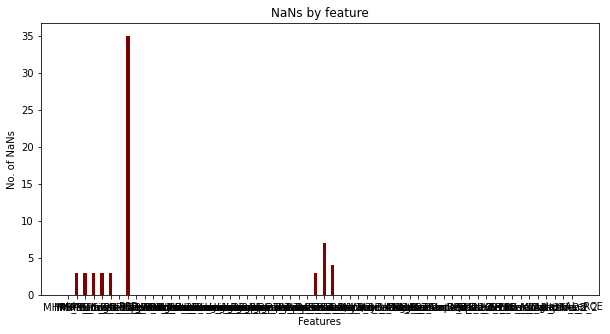

In [ ]:
nan_data = normalized_features.isna().sum()
#print(nan_data)
y = nan_data
x = list(normalized_features.columns)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("No. of NaNs")
plt.title("NaNs by feature")
plt.show()

### Fill Remaining NaNs

In [ ]:
features_nan_filled = normalized_features.fillna(normalized_features.mean())

features_nan_filled

 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,oid,MHPS_ratio_2,MHPS_low_2,MHPS_high_2,MHPS_non_zero_2,MHPS_PN_flag_2,Multiband_period,PPE,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,classALeRCE
1,ZTF18acenqto,-0.004860,-0.063240,0.009914,0.068442,0.882671,-0.055497,0.043921,0.878707,0.915068,...,0.120907,0.360018,0.205376,0.020977,0.002151,-0.268524,-0.334374,0.112235,-0.008429,SLSN
2,ZTF18abshezu,-0.003225,0.075972,-0.007896,-0.006887,-0.117329,-0.055491,-0.028093,0.878707,0.915064,...,-0.063982,0.077676,0.056584,0.020977,0.002271,-0.117819,-0.033691,0.100898,-0.163905,SLSN
3,ZTF18abslpjy,-0.004593,0.389278,0.069107,0.091041,0.882671,0.375847,-0.068505,0.162253,-0.083986,...,0.005169,0.602029,-0.017791,0.020977,-0.155118,-0.268524,-0.334374,0.112033,-0.035384,SLSN
4,ZTF19aanesgt,-0.004832,-0.061087,-0.005906,-0.037019,-0.117329,-0.056739,-0.048421,-0.121158,-0.083986,...,-0.065612,-0.050781,0.095840,0.020977,0.001786,-0.183929,-0.085392,-0.006451,-0.077210,SLSN
5,ZTF18acyxnyw,-0.003316,-0.000130,-0.010034,0.019478,0.882671,0.245085,-0.072044,0.076583,-0.083986,...,-0.055654,-0.006627,-0.084346,0.020977,0.001907,-0.133850,0.042780,0.099075,-0.025566,SLSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,ZTF19abqwtfu,-0.003003,0.129331,-0.007004,0.117407,-0.117329,0.248265,-0.069216,0.078667,-0.083986,...,-0.087355,0.238803,0.196688,0.020977,0.003562,0.144579,0.083481,0.107093,0.061610,SNIbc
723,ZTF20aalxlis,-0.004005,0.452964,0.017159,0.027011,-0.117329,0.258220,-0.010498,0.085189,-0.083986,...,-0.059575,0.261741,0.044148,0.020977,0.003636,0.517527,0.203121,0.107775,0.088514,SNIbc
724,ZTF20aavcvrm,-0.004526,-0.016324,-0.005067,0.049610,-0.117329,0.019907,-0.050547,-0.070943,-0.083986,...,-0.117479,0.046325,0.143867,0.020977,0.002061,0.060247,0.032343,0.086145,0.084141,SNIbc
725,ZTF20aaurexl,-0.003197,0.314821,-0.001018,0.049610,-0.117329,0.099747,0.027412,-0.018635,-0.083986,...,-0.086292,0.163144,0.212436,0.020977,0.002661,0.681077,0.179460,0.106288,0.157557,SNIbc


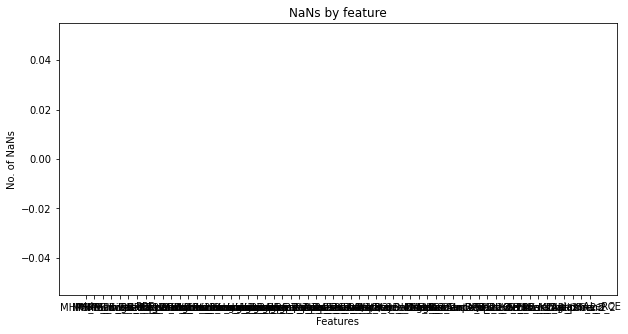

In [ ]:
nan_data = features_nan_filled.isna().sum()
#print(nan_data)
y = nan_data
x = list(features_nan_filled.columns)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("No. of NaNs")
plt.title("NaNs by feature")
plt.show()

As we can see no more NaNs exist and as such we are ready to store this fully preprocessed dataset into a csv to then be used by classification models.

In [ ]:
features_nan_filled.to_csv(pathData+'features_preprocessed.csv', encoding='utf-8', index=True)

NameError: ignored

## Read Features Preprocessed CSV

In [ ]:
features_preprocessed = pd.read_csv(pathData + 'features_preprocessed.csv')
features_preprocessed.pop('Unnamed: 0')
features_preprocessed
features_preprocessed_cpy = features_preprocessed


# Classification

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
classes = features_preprocessed["classALeRCE"].to_frame()
#converting the classes to numbers
mapping = {'SLSN': 0, 'SNII_Joined': 1, 'SNIa': 2,'SNIbc':3}
classes = classes.replace({'classALeRCE': mapping})

classes = classes.to_numpy()
classes = classes.flatten()
print(classes)
#removing the class from the original dataframe
features_preprocessed_cpy = features_preprocessed_cpy.drop(['classALeRCE'], axis=1)
features_preprocessed_cpy = features_preprocessed_cpy.drop(['oid'], axis=1)
print(features_preprocessed_cpy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

##Train Test split and Oversampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_preprocessed_cpy,classes,test_size=0.3,random_state=109)


In [ ]:
!python -m pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, y_train)
print(X_over)
print(X_train)

     MHPS_ratio_2  MHPS_low_2  MHPS_high_2  MHPS_non_zero_2  MHPS_PN_flag_2  \
0       -0.004609    0.097657     0.018799         0.042077       -0.117329   
1       -0.004077    0.035004    -0.005900        -0.055851        0.882671   
2       -0.004845   -0.064313    -0.009683        -0.052085       -0.117329   
3       -0.004858   -0.064496    -0.006243        -0.006887       -0.117329   
4       -0.004462   -0.038734    -0.008882         0.068442       -0.117329   
..            ...         ...          ...              ...             ...   
644     -0.005095   -0.065565    -0.012009        -0.052085        0.882671   
645     -0.005095   -0.065565    -0.012009        -0.052085        0.882671   
646     -0.001503   -0.046028    -0.011797         0.697444       -0.117329   
647     -0.003484   -0.025252    -0.010670         0.045844       -0.117329   
648     -0.003484   -0.025252    -0.010670         0.045844       -0.117329   

     Multiband_period           PPE  Period_band_2 

## SVM

In [ ]:


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=0.2,kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_over, y_over)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Model Evaluation

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7261904761904762
Precision: 0.7421754171754171
Recall: 0.7261904761904762


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

Confusion matrix, without normalization
[[  3   0   1   0]
 [ 11   9  18   0]
 [  6   4 110   0]
 [  0   0   6   0]]
Normalized confusion matrix
[[0.75       0.         0.25       0.        ]
 [0.28947368 0.23684211 0.47368421 0.        ]
 [0.05       0.03333333 0.91666667 0.        ]
 [0.         0.         1.         0.        ]]


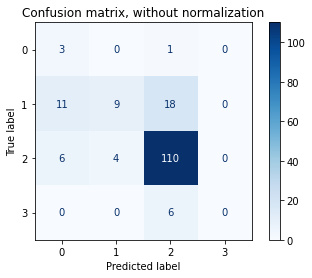

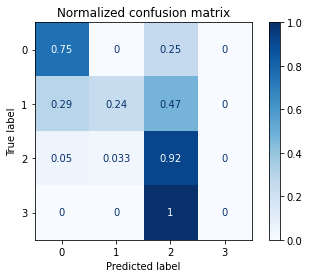

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels= [0,1,2,3],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()